In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
data_info = pd.read_csv('../DATA/lending_club_info.csv')

In [48]:
data_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [49]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  28 non-null     object
 1   Description  28 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes


In [50]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [51]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [52]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [54]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [55]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:>

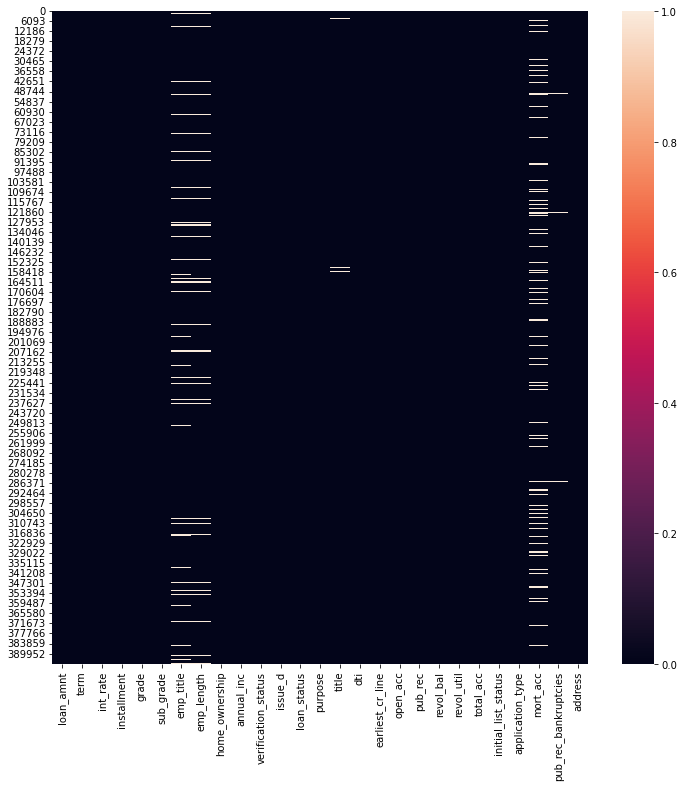

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull())

In [59]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [61]:
loan_dummy = pd.get_dummies(df['loan_status'], drop_first=True)
loan_dummy

,Fully Paid
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


In [62]:
df = pd.concat((df, loan_dummy), axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [ ]:
df.drop('loan_status', axis=1, inplace=True)

In [65]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [68]:
df.corr()['Fully Paid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Fully Paid              1.000000
Name: Fully Paid, dtype: float64

<AxesSubplot:>

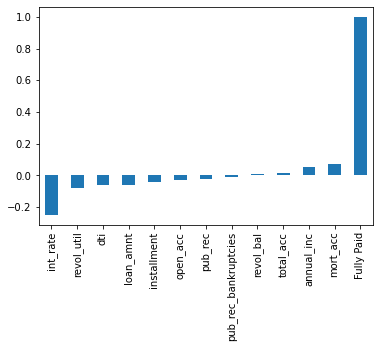

In [69]:
df.corr()['Fully Paid'].sort_values().plot(kind='bar')

In [70]:
df.drop('address', axis=1, inplace=True)

In [72]:
_p = df['emp_title'].unique()
len(_p)

173106

In [ ]:
df.drop('emp_title', axis=1, inplace=True)

In [75]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,1


In [76]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [78]:
app_type = pd.get_dummies(df['application_type'])
app_type

,DIRECT_PAY,INDIVIDUAL,JOINT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
396025,0,1,0
396026,0,1,0
396027,0,1,0
396028,0,1,0


In [79]:
df = pd.concat((df, app_type), axis=1)

<AxesSubplot:xlabel='INDIVIDUAL', ylabel='count'>

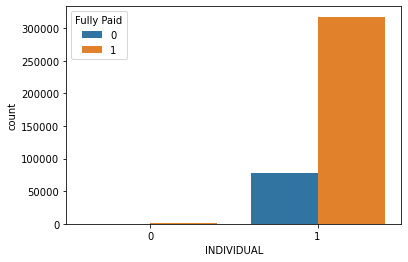

In [83]:
sns.countplot(x='INDIVIDUAL', hue='Fully Paid', data=df)

<AxesSubplot:xlabel='DIRECT_PAY', ylabel='count'>

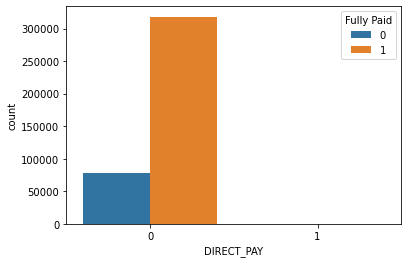

In [84]:
sns.countplot(x='DIRECT_PAY', hue='Fully Paid', data=df)

<AxesSubplot:xlabel='JOINT', ylabel='count'>

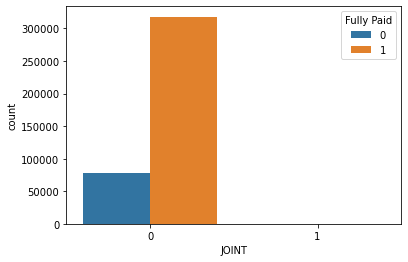

In [85]:
sns.countplot(x='JOINT', hue='Fully Paid', data=df)

In [86]:
df['JOINT'].value_counts()

0    395605
1       425
Name: JOINT, dtype: int64

In [87]:
df['DIRECT_PAY'].value_counts()

0    395744
1       286
Name: DIRECT_PAY, dtype: int64

In [88]:
df.drop(['DIRECT_PAY', 'INDIVIDUAL', 'JOINT', 'application_type'], axis=1, inplace=True)

In [89]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,0.0,0.0,1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,3.0,0.0,1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,0.0,0.0,1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,0.0,0.0,1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,0.0,0.0,1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,1.0,0.0,1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,0.0,0.0,1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,5.0,0.0,1


<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

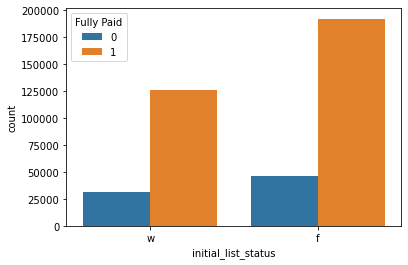

In [90]:
sns.countplot(x='initial_list_status', hue='Fully Paid', data=df)

In [91]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

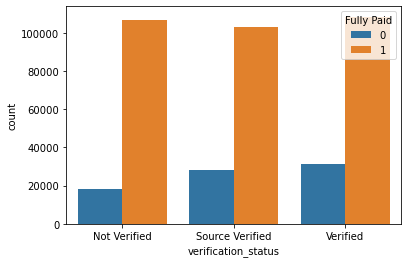

In [92]:
sns.countplot(x='verification_status', hue='Fully Paid', data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

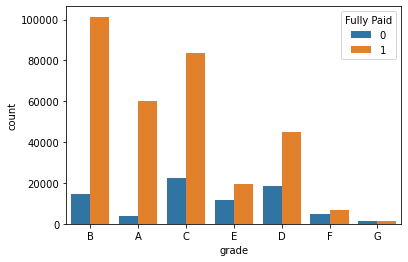

In [93]:
sns.countplot(x='grade', hue='Fully Paid', data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

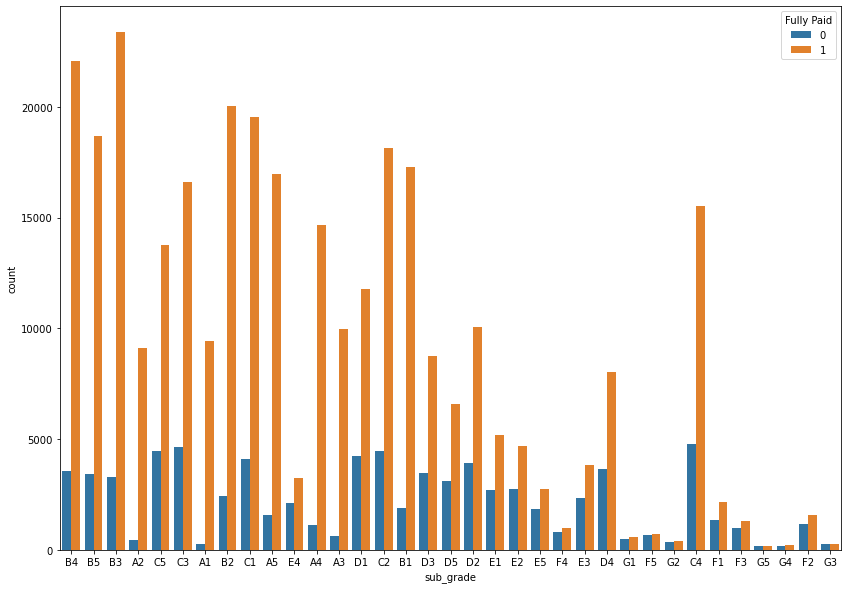

In [95]:
plt.figure(figsize=(14,10))
sns.countplot(x='sub_grade', hue='Fully Paid', data=df)

In [96]:
df.drop('sub_grade', axis=1, inplace=True)

In [97]:
df.drop('grade', axis=1, inplace=True)

In [98]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,Fully Paid
0,10000.0,36 months,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Jan-2015,vacation,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,0.0,0.0,1
1,8000.0,36 months,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,3.0,0.0,1
2,15600.0,36 months,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,0.0,0.0,1
3,7200.0,36 months,6.49,220.65,6 years,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,0.0,0.0,1
4,24375.0,60 months,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,1.0,0.0,0


<AxesSubplot:xlabel='emp_length', ylabel='count'>

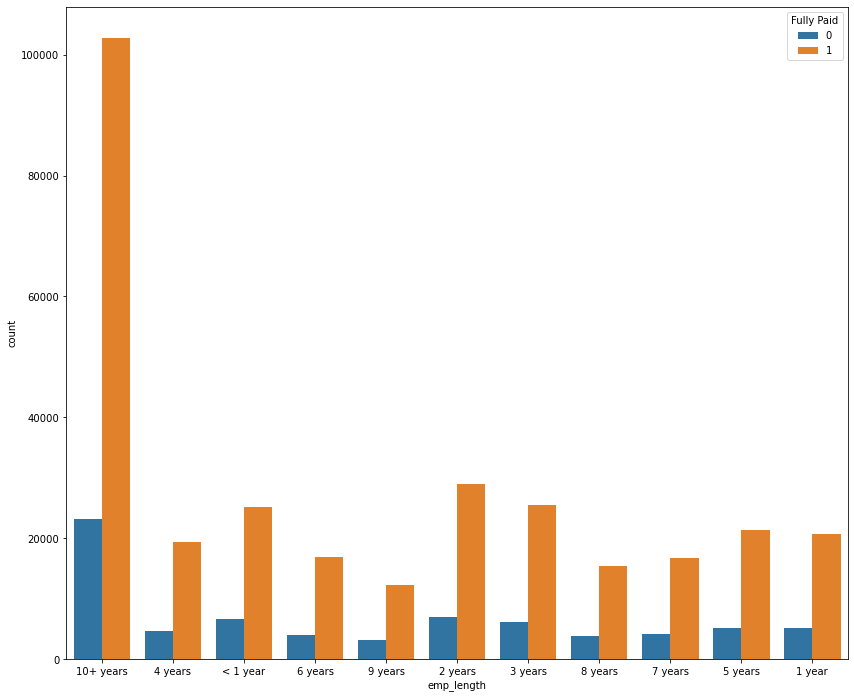

In [99]:
plt.figure(figsize=(14,12))
sns.countplot(x='emp_length', hue='Fully Paid', data=df)

In [ ]:
# It seems that 10 years and less than 10 years have clear cut difference

In [112]:
print(df.groupby('emp_length').groups)

{'1 year': [32, 67, 75, 77, 113, 117, 124, 149, 182, 183, 205, 209, 230, 298, 321, 338, 377, 393, 400, 417, 451, 454, 494, 495, 519, 531, 565, 569, 573, 582, 621, 632, 648, 657, 659, 672, 721, 729, 738, 745, 763, 787, 794, 804, 826, 827, 836, 842, 899, 928, 931, 951, 983, 993, 1016, 1027, 1039, 1051, 1059, 1101, 1107, 1109, 1148, 1165, 1170, 1179, 1183, 1188, 1222, 1224, 1232, 1246, 1268, 1269, 1271, 1292, 1296, 1297, 1312, 1317, 1318, 1323, 1330, 1352, 1363, 1365, 1371, 1415, 1430, 1431, 1461, 1466, 1469, 1481, 1482, 1498, 1500, 1511, 1517, 1541, ...], '10+ years': [0, 5, 7, 8, 13, 16, 17, 18, 21, 23, 28, 29, 30, 34, 37, 41, 43, 44, 46, 47, 61, 62, 65, 69, 74, 76, 89, 94, 95, 97, 98, 100, 102, 108, 109, 111, 112, 114, 121, 123, 126, 128, 130, 131, 133, 134, 135, 140, 141, 144, 153, 154, 156, 158, 159, 161, 163, 167, 169, 171, 172, 173, 177, 181, 186, 191, 195, 197, 198, 206, 208, 210, 214, 220, 221, 222, 223, 224, 225, 226, 228, 231, 237, 238, 239, 241, 242, 244, 245, 248, 253, 258, 2

In [113]:
groups = df.groupby(['emp_length', 'Fully Paid'])
for group_key, group_value in groups:
    group = groups.get_group(group_key)
    print(group)
    print("")

        loan_amnt        term  int_rate  installment emp_length  \
124       28000.0   60 months     13.67       646.74     1 year   
149        6375.0   36 months     24.50       251.79     1 year   
569       28100.0   60 months     16.78       695.04     1 year   
582        6000.0   36 months     14.33       206.03     1 year   
621       10000.0   36 months     14.33       343.39     1 year   
...           ...         ...       ...          ...        ...   
395736    18575.0   60 months     17.57       467.35     1 year   
395845    32400.0   60 months     19.52       849.78     1 year   
395855    17975.0   60 months     20.99       486.19     1 year   
395956     8450.0   60 months     11.49       185.80     1 year   
395965    24000.0   60 months     19.52       629.47     1 year   

       home_ownership  annual_inc verification_status   issue_d  \
124          MORTGAGE    104000.0            Verified  Dec-2015   
149               OWN     20000.0            Verified  May-20

[25483 rows x 22 columns]

        loan_amnt        term  int_rate  installment emp_length  \
78        17800.0   60 months     11.49       391.38    4 years   
82         8050.0   36 months     16.55       285.21    4 years   
157        9000.0   36 months     13.67       306.16    4 years   
201       13000.0   60 months     19.52       340.96    4 years   
252        4000.0   36 months     15.61       139.86    4 years   
...           ...         ...       ...          ...        ...   
395072    20950.0   36 months     12.39       699.75    4 years   
395448     6000.0   36 months     11.53       197.95    4 years   
395546    30400.0   36 months     10.99       995.12    4 years   
395600    20000.0   60 months     15.80       484.24    4 years   
395850    35000.0   60 months     17.57       880.61    4 years   

       home_ownership  annual_inc verification_status   issue_d  \
78           MORTGAGE     95000.0     Source Verified  Sep-2011   
82               RENT     29500.0 

[3829 rows x 22 columns]

        loan_amnt        term  int_rate  installment emp_length  \
11        35000.0   36 months     14.64      1207.13    8 years   
15        18000.0   36 months      8.39       567.30    8 years   
50        12875.0   36 months     17.10       459.67    8 years   
51        15000.0   60 months     18.25       382.95    8 years   
80        19000.0   36 months     12.12       632.17    8 years   
...           ...         ...       ...          ...        ...   
395858     5000.0   36 months      9.71       160.66    8 years   
395922     9600.0   36 months     12.12       319.41    8 years   
395939     9750.0   36 months     16.29       344.18    8 years   
396009    35000.0   60 months     12.69       790.82    8 years   
396017     9600.0   36 months      9.99       309.72    8 years   

       home_ownership  annual_inc verification_status   issue_d  \
11           MORTGAGE    130000.0            Verified  May-2014   
15           MORTGAGE     45000.0  

{('1 year', 0): [124, 149, 569, 582, 621, 648, 672, 738, 787, 827, 842, 1027, 1059, 1107, 1170, 1224, 1268, 1271, 1312, 1415, 1517, 1576, 1584, 1621, 1622, 1675, 1690, 2080, 2149, 2154, 2160, 2172, 2595, 2692, 2778, 2794, 2814, 2836, 2952, 3001, 3051, 3078, 3147, 3267, 3467, 3590, 3603, 3669, 3696, 3805, 3847, 3878, 4047, 4115, 4153, 4357, 4385, 4505, 4654, 4721, 4727, 4896, 5122, 5124, 5126, 5213, 5218, 5273, 5340, 5406, 5721, 5740, 5763, 5920, 5939, 6035, 6048, 6049, 6099, 6288, 6299, 6337, 6415, 6429, 6521, 6542, 6563, 6612, 6614, 6633, 6821, 6828, 6878, 6912, 7038, 7085, 7139, 7219, 7275, 7517, ...], ('1 year', 1): [32, 67, 75, 77, 113, 117, 182, 183, 205, 209, 230, 298, 321, 338, 377, 393, 400, 417, 451, 454, 494, 495, 519, 531, 565, 573, 632, 657, 659, 721, 729, 745, 763, 794, 804, 826, 836, 899, 928, 931, 951, 983, 993, 1016, 1039, 1051, 1101, 1109, 1148, 1165, 1179, 1183, 1188, 1222, 1232, 1246, 1269, 1292, 1296, 1297, 1317, 1318, 1323, 1330, 1352, 1363, 1365, 1371, 1430, 1431,

In [12]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [11]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [13]:
df.drop('mort_acc', inplace=True, axis=1)

In [14]:
df.drop('address', inplace=True, axis=1)

In [15]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [16]:
df.drop('emp_title', inplace=True, axis=1)

In [17]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,8.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [19]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,0.0


In [20]:
df["term"]

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 396030, dtype: object

In [21]:
df["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [22]:
df["term"] = df["term"].apply(lambda term: 36 if str(term).strip() == "36 months" else 60)

In [23]:
df["term"].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,0.0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,0.0


In [25]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [26]:
ownership = pd.get_dummies(df["home_ownership"])

In [27]:
ownership

,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
396025,0,0,0,0,0,1
396026,0,1,0,0,0,0
396027,0,0,0,0,0,1
396028,0,1,0,0,0,0


In [28]:
df = pd.concat([df, ownership], axis=1)

In [29]:
df.drop('home_ownership', axis=1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,...,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,B,B4,10+ years,117000.0,Not Verified,Jan-2015,...,25.0,w,INDIVIDUAL,0.0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,B,B5,4 years,65000.0,Not Verified,Jan-2015,...,27.0,f,INDIVIDUAL,0.0,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,43057.0,Source Verified,Jan-2015,...,26.0,f,INDIVIDUAL,0.0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,A,A2,6 years,54000.0,Not Verified,Nov-2014,...,13.0,f,INDIVIDUAL,0.0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,C,C5,9 years,55000.0,Verified,Apr-2013,...,43.0,f,INDIVIDUAL,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,2 years,40000.0,Source Verified,Oct-2015,...,23.0,w,INDIVIDUAL,0.0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,C,C1,5 years,110000.0,Source Verified,Feb-2015,...,8.0,f,INDIVIDUAL,0.0,0,1,0,0,0,0
396027,5000.0,36,9.99,161.32,B,B1,10+ years,56500.0,Verified,Oct-2013,...,23.0,f,INDIVIDUAL,0.0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,C,C2,10+ years,64000.0,Verified,Aug-2012,...,20.0,f,INDIVIDUAL,0.0,0,1,0,0,0,0


In [30]:
df["issue_d"]

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [31]:
df["date1"] = pd.to_datetime(df["issue_d"])

In [32]:
df["date1"] 

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2014-11-01
4        2013-04-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: date1, Length: 396030, dtype: datetime64[ns]

In [33]:
# non_top_1_perc['month'] = non_top_1_perc['date'].apply(lambda date:date.month)
df['year'] = df['date1'].apply(lambda date:date.year)

In [34]:
df['month'] = df['date1'].apply(lambda date:date.month)

In [35]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec_bankruptcies,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,date1,year,month
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,0,0,0,0,0,1,2015-01-01,2015,1
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,0,1,0,0,0,0,2015-01-01,2015,1
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,0,0,0,0,0,1,2015-01-01,2015,1
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,0,0,0,0,0,1,2014-11-01,2014,11
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,0,1,0,0,0,0,2013-04-01,2013,4


In [36]:
df['date'] = df['date1'].apply(lambda date:date.date)

In [37]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,date1,year,month,date
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0,0,0,0,0,1,2015-01-01,2015,1,<built-in method date of Timestamp object at 0...
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0,1,0,0,0,0,2015-01-01,2015,1,<built-in method date of Timestamp object at 0...
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0,0,0,0,0,1,2015-01-01,2015,1,<built-in method date of Timestamp object at 0...
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0,0,0,0,0,1,2014-11-01,2014,11,<built-in method date of Timestamp object at 0...
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0,1,0,0,0,0,2013-04-01,2013,4,<built-in method date of Timestamp object at 0...


In [38]:
df.drop('date', axis=1, inplace=True)

In [39]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec_bankruptcies,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,date1,year,month
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,0,0,0,0,0,1,2015-01-01,2015,1
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,0,1,0,0,0,0,2015-01-01,2015,1
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,0,0,0,0,0,1,2015-01-01,2015,1
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,0,0,0,0,0,1,2014-11-01,2014,11
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,0,1,0,0,0,0,2013-04-01,2013,4


In [40]:
df.drop('date1', axis=1, inplace=True)

In [41]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [42]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [43]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [44]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [45]:
# emp_length
emp_len_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '5 years': 5, '1 year': 1, '4 years': 4, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9}

In [46]:
df['emp_length'] = df['emp_length'].apply(lambda emp_length: emp_len_map[emp_length] if not emp_length.isna() else -1)

AttributeError: 'str' object has no attribute 'isna'

In [ ]:
df['emp_length'].isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['verification_status'].isnull().sum()

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

In [ ]:
df['application_type'].value_counts()

In [ ]:
sns.countplot('loan_status', data=df)

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(x='loan_amnt', data=df, bins=30)

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(x='loan_amnt', data=df, hue='loan_status', palette='viridis', bins=30)

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='installment', y='loan_amnt', data=df, hue='loan_status')

In [ ]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [ ]:
df['loan_status'].groupby(df['loan_status']).describe()

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

In [ ]:
print(df['grade'].unique())

In [ ]:
print(df['sub_grade'].unique())

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', data=df, hue='loan_status')

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade', data=df, hue='loan_status')

In [ ]:
plt.figure(figsize=(12,6))
order = df.sort_values('sub_grade')['sub_grade'].unique()
order
sns.countplot(x='sub_grade', data=df, order=order)

In [ ]:
plt.figure(figsize=(14,6))
order = df.sort_values('sub_grade')['sub_grade'].unique()
order
sns.countplot(x='sub_grade', data=df, order=order, hue='loan_status')

In [ ]:
df['loan_repaid'] = df['loan_status'].apply(lambda loan_status: 1 if loan_status == 'Fully Paid' else 0)

In [ ]:
df['loan_status']

In [ ]:
df['loan_repaid'] 

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar', figsize=(12,12))